In [ ]:
# Fitting MRP to a theoretical HMF curve

In this example, we do something very simple -- fit the MRP parameters using a theoretically produced HMF. This might be one of the first things you'd want to do with the MRP. In addition to the simple fit, we'll also change the truncation scale, to see how the fit performs over different mass ranges.

** The resulting plot appears as figure 1 in MRP**

In [6]:
#Import necessary libraries
%matplotlib inline
plt.ioff()
from mrpy import get_fit_curve

#We'll use the hmf package to produce the theoretical HMF
from hmf import MassFunction

First, we produce a *hmf* model consistent with the Planck 2013 data, and resolved enough to produce a high-quality fit:

In [2]:
hmf = MassFunction(hmf_model="Tinker08",Mmin=9,Mmax=15.5,lnk_min=-13,lnk_max=13,
                   dlnk=0.01, transfer_params={"transfer__kmax":50.0},
                   cut_fit=False,sigma_8=0.829,n=0.9603,dlog10m=0.1,
                   cosmo_params={"Om0":0.315,"Ob0":0.02205/0.673**2,"H0":67.3})

Here's the important part: actually fitting the data.

In [13]:
# Create the lists that we'll use to save the results
res = [0]*3
obj = [0]*3

# 3 different truncation masses
mmins = [1e9,1e11,1e13]

for i,mmin in enumerate(mmins): 
    # Get theoretical data
    dndm = hmf.dndm[hmf.M > mmin]
    m = hmf.M[hmf.M>mmin]
    
    # Fit the MRP in the *simplest* way possible.
    res[i], obj[i] = get_fit_curve(m,dndm)
    
    print "logHs, alpha, beta, lnA: ", res[i].x # the actual result values


logHs, alpha, beta, lnA:  [ 14.47918395  -1.87632723   0.74915175 -43.49713308]
logHs, alpha, beta, lnA:  [ 14.42418245  -1.85948334   0.71612775 -43.12492036]
logHs, alpha, beta, lnA:  [ 14.41678523  -1.85766542   0.71187614 -43.07520332]


Next the boring stuff... setting up and plotting the figure.

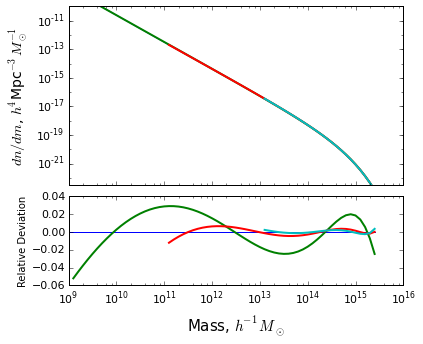

In [17]:
# Create the figure object
fig,ax = plt.subplots(2,1,sharex=True,squeeze=True,gridspec_kw={"height_ratios":(2,1)},figsize=(6,5),
                      subplot_kw={"xscale":"log"})

# Set up the axis styles etc.
ax[0].set_yscale('log')
ax[0].set_ylim((3e-23,1e-10))
ax[1].set_xlabel(r"Mass, $h^{-1}M_\odot$",fontsize=15)
ax[0].legend(loc=0,frameon=False)
ax[0].set_ylabel(r"$dn/dm$, $h^{4}$Mpc$^{-3}M_\odot^{-1}$",fontsize=14)
ax[1].set_ylabel("Relative Deviation")
ax[0].yaxis.set_major_locator(LogLocator(numticks=9))
ax[1].yaxis.set_major_locator(MaxNLocator(5))
ax[0].tick_params(axis='both', which='major', labelsize=11)
ax[1].tick_params(axis='both', which='major', labelsize=11)

# Contract the space a bit
plt.subplots_adjust(wspace=0.08,hspace=0.08)
    
# Plot the theoretical data
ax[0].plot(hmf.M,hmf.dndm,label="Tinker+08")
ax[1].plot(hmf.M,hmf.dndm/hmf.dndm-1)

# Plot the fitted data.
# Note that 'obj' contains lots of quantities of interest, not least of which is a method
# to calculate dn/dm!
for i in range(3):
    ax[0].plot(obj[i].m,obj[i].dndm(),label=r"MRP $M_{\rm min}=10^{%s}$"%np.log10(mmins[i]),lw=2)
    ax[1].plot(obj[i].m,obj[i].dndm()/hmf.dndm[hmf.M > mmins[i]]-1,lw=2)



In [20]:
# Just for me :)
fig.savefig("../../mrpArticle/figures/comparison_tinker.pdf")